# Tarea 1
## Conducción de calor en 1D estacionaria
### Carlos Japhet Arellanos Balcázar
### Geofísica Matemática y Computacional

1 de Octubre de 2021

### Modelo conceptual

El calor sólo puede ser transferido de tres maneras: por **conducción**, convección y radiación. De estas tres opciones, la más común suele ser la conducción, ya que esta sucede incluso dentro de la naturaleza.

El proceso de conducción, de manera sencilla, se da mediante el contacto de dos cuerpos: uno de alta temperatura y otro de baja temperatura. Naturalmente, el calor será transferido del cuerpo de alta temperatura al de baja temperatura, dado que la temperatura de este último es simplemente generado por la ausencia de calor.

Este proceso, depende de cuatro factores básicos: el **gradiente de temperatura**, el espesor de los materiales involucrados, la trayectoria de la transferencia y sus **propiedades**.

El gradiente de la temperatura es una cantidad física que describe cómo varía esta respecto a la dirección y a que ritmo lo hace. El espesor y la trayectoria son importantes, ya que entre mayor sea el tamaño de los materiales o la trayectoria, mayor calor sera necesario. Las propiedades juegan un factor muy importante también, gracias a la existencia de materiales con alta, baja y nula **conductividad térmica**; esto significa que habrán materiales que permitan el flujo del calor fácilmente, otros en los que habrá un flujo menor y otros en los que simplemente no habrá ningún tipo de transferencia.

Generalmente, se asume que estos procesos dependen tanto de la posición como del tiempo; sin embargo, para **casos estacionarios** (donde **no hay variación temporal**), simplemente se toma en cuenta el cambio respecto a la posición lo que simplifica el modelo matemático. Se puede simplificar aún más, si asumimos que el proceso de transferencia es **unidimensional**, lo cual convierte el gradiente en una **variación lineal**, a comparación de la variación espacial.

A este modelo unidimensional, podemos agregarle ciertas restricciones que limiten (y reduzcan incluso) las consideraciones a tomar. En este caso, se asumen *condiciones de frontera* en las que fijamos los extremos de este proceso a valores fijos de temperatura. Además, en un primer caso, puede omitirse la existencia de una fuente o sumidero de calor, lo cual termina por hacer el modelo general a definir como un modelo cuasi-lineal.

### Modelo matemático

De manera general, el modelo matemático que describe la transferencia de calor **no estacionaria** en el espacio:

$$
c_{p} \rho \frac{\partial T}{\partial t} + c_{p} \rho \nabla \cdot \left(\mathbf{u}T\right) - \nabla^{2} \left(\kappa T\right) = S
$$

Si simplificamos intercambiando la notación vectorial por notación índice y además asumiendo que el flujo es incompresible ($\nabla \cdot \mathbf{u} = 0$), obtenemos:

$$
c_{p} \rho \frac{\partial T}{\partial t} + c_{p} \rho \frac{\partial}{\partial x_{j}} \left(u_{j} T \right) - \frac{\partial}{\partial x_{j}} \left(\kappa \frac{\partial T}{\partial x_{j}} \right) = S
$$

donde:
* $x_{j}$ son las coordenadas cartesianas de posición -> $\mathbf{x} \equiv (x_{1}, x_{2}, x_{3})$
* $t$ es el tiempo
* $T$ es la función de la temperatura en términos de la posición y el tiempo -> $T \equiv T(\mathbf{x}, t)$
* $u_{j}$ son las componentes de velocidad -> $\mathbf{u} \equiv (u_{1}, u_{2}, u_{3})$
* $c_{p}$ es la capacidad térmica específica
* $\rho$ es la densidad de masa
* $S$ es la fuente o sumidero
* $\kappa$ es la conductividad térmica

Si descartamos el término temporal (asumiendo un **régimen estacionario**), el término de convección (suponiendo que **no existe transferencia de calor fuera del cuerpo**), que se está trabajando en un medio lineal unidimensional y que la conductividad térmica es constante (no depende de la posición) se llega a:

$$
-\kappa \left(\frac{\partial^{2} T}{\partial x^{2}}\right) = S
$$

Ahora, limitamos el modelo matemático imponiendo condiciones de frontera a la función de la temperatura (condiciones de tipo Dirichlet):

$$
T(0) = T_{A}\\
T(L) = T_{B}
$$

donde se asume que el medio es una barra elongada con longitud $L$.

### Modelo numérico

#### Espacial

Lo que queda por hacer ahora, es establecer la forma en la que discretizaremos nuestro medio a trabajar.

Para ello, siguiendo la suposición de un **medio lineal** (una barra elongada), lo que se hará es dividir este medio en $N$ puntos, incluyendo dos puntos a los extremos que corresponden a las fronteras; estos puntos, serán los **nodos** donde se estará calculando el valor de la temperatura dentro de la barra.

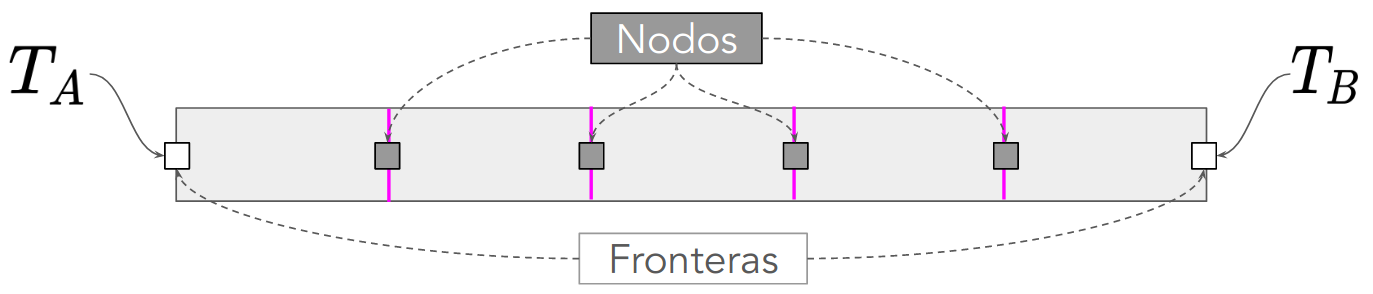
<center> Figura 1. Discretización del dominio, se indican los nodos de manera ejemplificada y los puntos de las fronteras. Tomada de Cruz Salas, (s.f). <center>

Estos nodos, se numeran del $0$ al valor $N + 1$. De esta numeración, basados en la *Figura 1*, es claro que los los nodos en los cuales se hará el cálculo serán los nodos de $1$ a $N$.

#### Ecuaciones

La manera en la que hemos discretizado el espacio no es suficiente para determinar la solución: es necesario también discretizar el modelo con el que se va a trabajar.

Para esto, conociendo que nuestro modelo es una ecuación diferencial de segundo grado, es coherente que la aproximación lineal a usar sea una se segundo orden:

$$
\frac{d T^2}{d x^2} \approx \frac{T_{i + 1} - 2T_{i} + T_{i - 1}}{h^2}
$$

Esta aproximación se obtiene de la expansión en series de Taylor.

Los índices $i$ en la aproximación corresponde a la posición del nodo en el cual se hará la aproximación, $i - 1$ hace referencia al nodo anterior a este y $i + 1$ al nodo siguiente.

Siguiendo la discretización de la *Figura 1*, lo que hacemos es fijar una distancia $h$, de manera que los nodos se encuentren equiespaciados.

Sustituyendo la aproximación en la ecuación diferencial de la conducción, llegamos al siguiente resultado:

$$
-\kappa \left(\frac{T_{i + 1} - 2T_{i} + T_{i - 1}}{h^2}\right) = S
$$

Definimos una nueva variable $r_{i}$ la cual representa el cociente de la conductividad térmica y la separación $r_{i} = -\frac{\kappa}{h^2}$ y reescribimos la ecuación anterior como:

$$
-r_{i} T_{i - 1} + 2 r_{i} T_{i} - r_{i} T_{i + 1} = S_{i}
$$

Si tomamos un ejemplo con 4 nodos y dos fronteras, el sistema de ecuaciones quedaría de la siguiente manera:

$$
- r_{1} T_{A} + 2 r_{1} T_{1} - r_{1} T_{2} = S_{1}\\
- r_{2} T_{1} + 2 r_{2} T_{2} - r_{2} T_{3} = S_{2}\\
- r_{3} T_{2} + 2 r_{3} T_{3} - r_{3} T_{4} = S_{3}\\
- r_{4} T_{3} + 2 r_{4} T_{4} - r_{4} T_{B} = S_{4}
$$

Nótese que los valores de $T_{0}$ y $T_{5}$ corresponden a los valores de frontera $T_{A}$ y $T_{B}$, respectivamente. Sabiendo que estos valores son constantes, podemos moverlos al lado derecho de la ecuación. Lo que nos queda como:

$$\begin{matrix}
2 r_{1} T_{1} & - & r_{1} T_{2} & & & & & = & S_{1} & + & r_{1} T_{A}\\
- r_{2} T_{1} & + & 2 r_{2} T_{2} & - & r_{2} T_{3} & & & = & S_{2}\\
& - & r_{3} T_{2} & + & 2 r_{3} T_{3} & - & r_{3} T_{4} & = & S_{3}\\
& & & - & r_{4} T_{3} & + & 2 r_{4} T_{4} & = & S_{4} & + & r_{4} T_{B}
\end{matrix}$$

De este arreglo de ecuaciones, se puede obtener una ecuación matricial de manera sencilla la cual queda de la siguiente manera:

$$
\begin{bmatrix}
2 & -1 & 0 & 0 \\
-1 & 2 & -1 & 0 \\
0 & -1 & 2 & -1 \\
0 & 0 & -1 & 2 \\
\end{bmatrix}
\begin{bmatrix}
T_{1} \\ T_{2} \\ T_{3} \\ T_{4}
\end{bmatrix}
=
\frac{1}{r} \,
\begin{bmatrix}
S_{1} \\ S_{2} \\ S_{3} \\ S_{4}
\end{bmatrix}
+
\begin{bmatrix}
T_{A} \\ 0 \\ 0 \\ T_{B}
\end{bmatrix}
$$

Esta es una ecuación particular, sin embargo es posible extenderla a **N** dimensiones.

### Modelo computacional

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [4]:
#1.A: Celda 1. La función buildMatrix(N).
def buildMatrix(N):
    """
    Regresa una matriz de N x N con los coeficientes de la matriz A del sistema lineal para la conducción de calor
    
    Parameters:
    -------
    N: int tamaño de la matriz
    """
    
    # Matriz de ceros
    A = np.zeros((N, N))
    
    # Primer renglón
    A[0, 0] = 2
    A[0, 1] = -1
    # Renglones interiores
    for i in range(1, N - 1):
        A[i, i] = 2
        A[i, i + 1] = -1
        A[i, i - 1] = -1
    # Último renglón
    A[N - 1, N - 2] = -1
    A[N - 1, N - 1] = 2
    
    return A

In [5]:
#1.B: Celda 2. Los parámetros físicos y numéricos.

# Parámetros físicos
L = 1.0
TA = 1
TB = 0
k = 1.0
S = 0.0

# Parámetros numéricos
N = 4
h = L / (N + 1)
r = k / h**2

[1.  0.8 0.6 0.4 0.2 0. ]


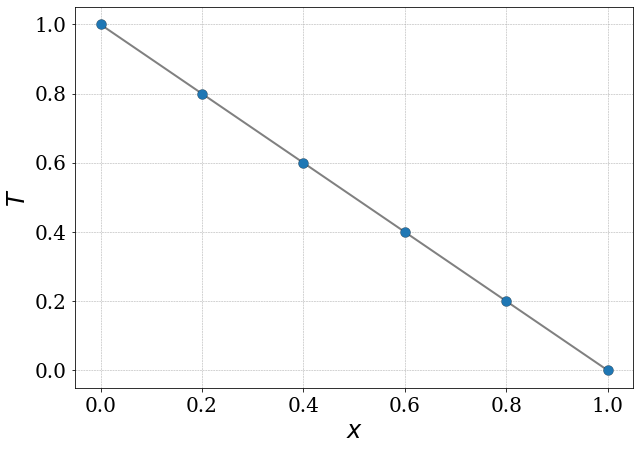

In [6]:
#1.C: Celda 3. El código que resuelve el problema y grafica la solución.

# Arreglo para almacenar la solución

T = np.zeros(N + 2)
T[0] = TA # Frontera izquierda
T[-1] = TB # Frontera derecha

# Lado derecho del sistema
b = np.zeros(N)
b[:] = S / r # Fuente o sumidero
# Condiciones de frontera
b[0] += T[0] 
b[-1] += T[-1]

# Construcción de la matriz
A = buildMatrix(N)

# Solución del sistema lineal
T[1:N + 1] = np.linalg.solve(A, b)

# Impresión y graficación de la solución
print(T)
x = np.linspace(0, L, N + 2)
plt.figure(figsize = (10, 7))
plt.plot(x, T, c = 'grey', lw = 2.0)
plt.scatter(x, T, edgecolor = 'k', zorder = 10)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.grid()
plt.show()

La respuesta de esta gráfica, se explica directamente del modelo matemático con el cual se trabajó-

Recordando:

$$
- \kappa \frac{\partial^{2} T}{\partial x^{2}} = S
$$

En este caso, el efecto de fuente/sumidero es nulo, de manera que el modelo se simplifica a:

$$
- \kappa \frac{\partial^{2} T}{\partial x^{2}} = 0
$$

Si esto lo resolvemos, de manera sencilla, por medio de integración:

$$
- \kappa \frac{\partial T}{\partial x} = a\\
- \kappa T = ax + b
$$

Lo cual, como se puede observar, es la ecuación de una recta. Evidentemente, los valores de $a$ y $b$ estarán ligados a las condiciones de frontera del sistema y a las propiedades del dominio.

In [7]:
#2.A: Funcion def solExact(x, TA, TB, k, L, S):
def solExact(x, TA, TB, k, L, S):
    """
    Cálculo de la solución exacta
    
    Parameters:
    -------
    x: array valores del tamaño del espacio
    TA: float temperatura inicial
    TB: float temperatura final
    k: float conductividad térmica
    L: float longitud del espacio
    S: float fuente o sumidero
    
    """
    return ((TB - TA) / L + (S / (2 * k)) * (L - x)) * x + TA

#2.B: Función def solNum(L, N, k, S, A, b, T, etiqueta):
def solNum(L, N, k, S, A, b, T, etiqueta):
    """
    Solución numérica de la ecuación diferencial
    
    Parameters:
    -------
    L: float longitud del espacio
    N: int tamaño de la matriz
    k: float conductividad térmica
    S: fuente o sumidero
    A: array matriz de coeficientes del sistema lineal
    b: array vector con los coeficientes del lado derecho del sistema lineal
    T: array vector de temperaturas
    etiqueta: string nombre de las etiquetas para las gráficas
    """
    
    h = L / (N + 1)
    r = k / h**2
    
    # Lado derecho del sistema
    b = np.zeros(N)
    b[:] = S / r # Fuente o sumidero
    # Condiciones de frontera
    b[0] += T[0]
    b[-1] += T[-1]
    
    # Solución del sistema lineal
    T[1:N + 1] = np.linalg.solve(A, b)
    
    # Impresión y graficación de la solución
    x = np.linspace(0, L, N + 2)
    
    # Construcción de la etiqueta de cada gráfica
    if etiqueta == 'L':
        etiqueta = '$L$ = {:3.2f}'.format(L)
    elif etiqueta == 'k':
        etiqueta = '$\kappa$ = {:3.2f}'.format(k)
    elif etiqueta == 'S':
        etiqueta = '$S$ = {:3.2f}'.format(S)
        
    # Se grafican los puntos de la solución
    plt.scatter(x, T, edgecolor = 'k', s = 50, zorder = 10, label = etiqueta)
    
    return
    
#2.C: Función def plotSol(title, filename):
def plotSol(title, filename):
    """
    Formato de las gráficas a realizar
    
    Parameters:
    -------
    title: string título de la gráfica
    filename: string nombre del archivo donde se guardará la figura
    """
    plt.suptitle('Conducción estacionaria', fontsize = 24, y = 0.94, va = 'center_baseline')
    plt.title(title, fontsize = 20, color = 'blue')
    plt.ylabel('$T$')
    plt.xlabel('$x$')
    plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 12)
    plt.grid()
    plt.savefig(filename)
    plt.show()
    
    return

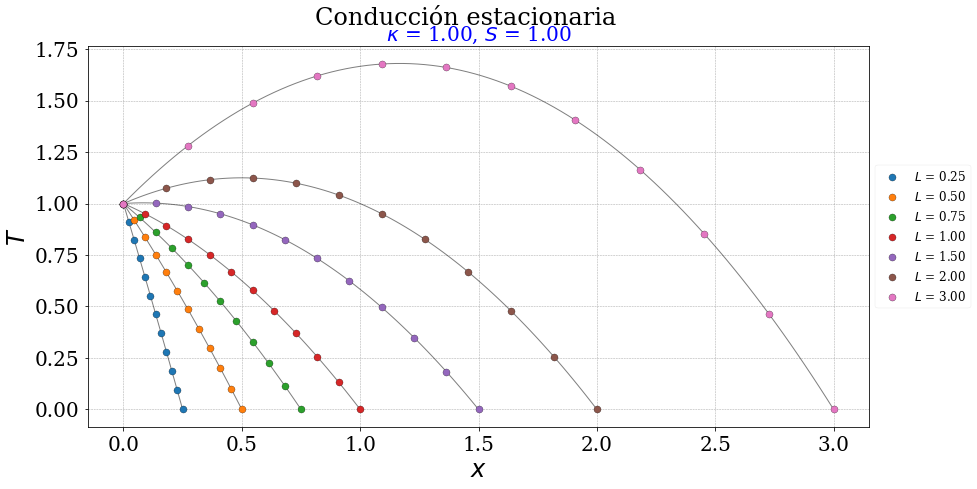

In [15]:
#3: Variando la longitud del dominio (L).

# Parámetros físicos
l = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]
TA = 1.0
TB = 0.0
k = 1.0
S = 1.0

# Parámetros numéricos
N = 10

# Arreglo para almacenar la solución
T = np.zeros(N + 2)
T[0] = TA # Frontera izquierda
T[-1] = TB # Frontera derecha

# Construcción de la matriz
A = buildMatrix(N)

for L in l:
    # Error: PDF indica solNumerica
    solNum(L, N, k, S, A, b, T, 'L')
    xe = np.linspace(0, L, 100)
    # Error: PDF indica solExacta
    plt.plot(xe, solExact(xe, TA, TB, k, L, S), 'k-', lw = 1.0, alpha = 0.5)
    
plotSol('$\kappa$ = {:3.2f}'.format(k) + ', $S$ = {:3.2f}'.format(S), 'grafica_l.pdf')

Aquí, se presenta un efecto peculiar, asociado a la longitud de nuestro dominio. Como se puede observar, cuando aumentamos esta longitud, el efecto de la fuente se amplifica. Esto se puede entender de esta manera: cuando el dominio es corto, la fuente deberá suministrar una cantidad de calor mínima de manera que las condiciones del sistema se cumplan. Pero, conforme aumenta la longitud del dominio, la fuente se ve obligada a suministrar mayor cantidad de calor a modo de que las condiciones que existen en la frontera se cumplan. 

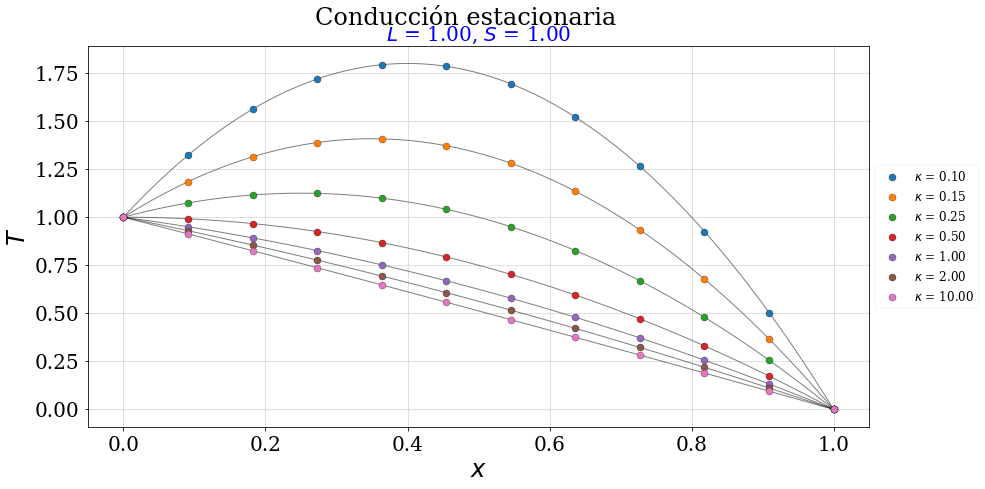

In [13]:
#4.A: Variando la conductividad térmica (k).

# Parámetros físicos
l = 1.0
TA = 1.0
TB = 0.0
k = [0.1, 0.15, 0.25, 0.5, 1.0, 2.0, 10]
S = 1.0

# Parámetros numéricos
N = 10

# Arreglo para almacenar la solución
T = np.zeros(N + 2)
T[0] = TA # Frontera izquierda
T[-1] = TB # Frontera derecha

# Construcción de la matriz
A = buildMatrix(N)

for kappa in k:
    # Error: PDF indica solNumerica
    solNum(l, N, kappa, S, A, b, T, 'k')
    xe = np.linspace(0, l, 100)
    # Error: PDF indica solExacta
    plt.plot(xe, solExact(xe, TA, TB, kappa, l, S), 'k-', lw = 1.0, alpha = 0.5)
    
plotSol('$L$ = {:3.2f}'.format(l) + ', $S$ = {:3.2f}'.format(S), 'grafica_2.pdf')

Para este caso, hay un efecto parecido al de la gráfica anterior, sin embargo ahora el factor decisivo es la conductividad. Lo que se observa es un efecto de fuente altamente marcado cuando el valor de la conductivdad es bajo. Cuando el valor de la conductividad es alto, la gráfica tiene un comportamiento casi lineal. Esto se debe a que, si el valor de la conductividad es muy bajo, se requerirá que la fuente suministre mayor calor a manera de conseguir los valores que tenemos en las fronteras, dado que la propagación será muy baja. Si tenemos un valor alto, la fuente tendrá que suministrar un mínima cantidad de calor para poder cumplir con las condiciones del sistema.

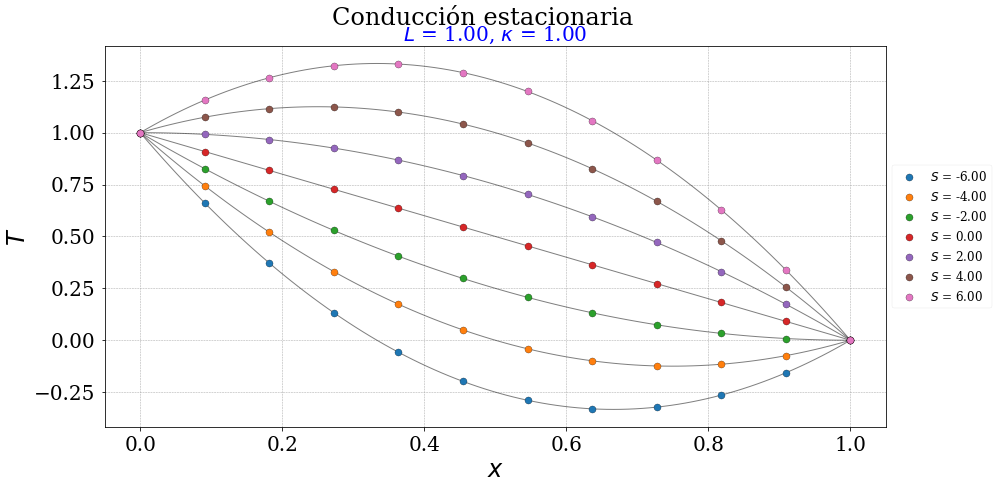

In [11]:
#4.B: Variando la fuente (S).

# Parámetros físicos
l = 1.0
TA = 1.0
TB = 0.0
k = 1.0
S = [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]

# Parámetros numéricos
N = 10

# Arreglo para almacenar la solución
T = np.zeros(N + 2)
T[0] = TA # Frontera izquierda
T[-1] = TB # Frontera derecha

# Construcción de la matriz
A = buildMatrix(N)

for s in S:
    # Error: PDF indica solNumerica
    solNum(l, N, k, s, A, b, T, 'S')
    xe = np.linspace(0, l, 100)
    # Error: PDF indica solExacta
    plt.plot(xe, solExact(xe, TA, TB, k, l, s), 'k-', lw = 1.0, alpha = 0.5)
    
plotSol('$L$ = {:3.2f}'.format(l) + ', $\kappa$ = {:3.2f}'.format(k), 'grafica_3.pdf')

En este caso, lo que observamos es una variación en los valores de la temperatura, la cual está asociada directamente al valor de su $S$. Dado que esta representa la existencia de una fuente (ganancia de calor) o un sumidero (pérdida de calor), es de esperarse que este comportamiento se vea reflejado en la gráfica. Además, hay una particularidad dentro de estas: para los valores de fuente, esta se encuentra más cerca del extremo izquierdo; los valores de sumidero, su efecto es notorio en el extremo derecho. Esto está directamente relacionado a los valores que estos extremos tienen: el extremo izquierdo presenta el valor de $T = 1$ y por ende, es de esperarse que la fuente se encuentre cerca dado que el extremo opuesto presenta el valor de $T = 0$. Caso contrario, el extremo derecho presenta el valor de $T = 0$, y dado que su opuesto tiene un valor de $T = 1$, es evidente que el sumidero se encuentre en este lado.

Como dato adicional, si ambos extremos tuviesen el mismo valor, los efectos del sumidero y fuente los veríamos centrados en la gráfica.

## Referencias

* Connor, N. (May, 2019). What is Fourier's Law of Thermal Conduction - Definition. [Online]. Recuperado de: https://www.thermal-engineering.org/what-is-fouriers-law-of-thermal-conduction-definition/
* Cruz Salas, L. (s.f.). Diferencias Finitas. _Problemas estacionarios_. [PDF].
* LumenLearning (s.f.). Boundless Physics. _Methods of Heat Transfer_. [Online]. Recuperado de: https://courses.lumenlearning.com/boundless-physics/chapter/methods-of-heat-transfer/
* Spakovszky, Z., Waitz, I. (2006-2007). 16. Unified Thermodynamics and Propulsion. _Steady-State One-Dimensional Conduction_. [HTML] Recuperado de: https://web.mit.edu/16.unified/www/FALL/thermodynamics/notes/node117.html
* Wikipedia. (s.f.). Heat equation. _Steady-state heat equation_. [Online]. Rceuperado de: https://en.wikipedia.org/wiki/Heat_equation#Steady-state_heat_equation
* Williams, M. (Sep, 2014). What is heat conduction?. [Online]. Recuperado de: https://phys.org/news/2014-12-what-is-heat-conduction.html